In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import random
import keras.backend as K
K.set_image_data_format('channels_last')
import keras

Using TensorFlow backend.


In [176]:
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]

for i in range(1,37):
    s="%03d"%i
    directory="./English/Fnt/Sample"+s
    for j in range(1,1017):
        s2="%05d"%j
        img_name=directory+"/img"+s+"-"+s2+".png"
        img=cv2.imread(img_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_CUBIC)
        if j<=762:
            X_train.append(img)
        else:
            X_test.append(img)

In [177]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test) 
for i in range(0,36):
    for k in range(1016):
        temp=np.zeros(36)
        temp[i]=1
        if k<762:
            Y_train.append(temp)
        else:
            Y_test.append(temp)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

In [178]:
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [179]:
num_classes = 36
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 27432
number of test examples = 9144
X_train shape: (27432, 32, 32, 1)
Y_train shape: (27432, 36)
X_test shape: (9144, 32, 32, 1)
Y_test shape: (9144, 36)


In [180]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [181]:
epochs = 10
batch_size = 128
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 27432 samples, validate on 9144 samples
Epoch 1/10
27432/27432 [==============================] - 295s 11ms/step - loss: 1.0335 - acc: 0.7220 - val_loss: 0.6395 - val_acc: 0.8502
Epoch 2/10
27432/27432 [==============================] - 278s 10ms/step - loss: 0.3250 - acc: 0.9095 - val_loss: 0.5570 - val_acc: 0.8644
Epoch 3/10
27432/27432 [==============================] - 279s 10ms/step - loss: 0.2214 - acc: 0.9337 - val_loss: 0.5444 - val_acc: 0.8773
Epoch 4/10
27432/27432 [==============================] - 278s 10ms/step - loss: 0.1712 - acc: 0.9467 - val_loss: 0.5359 - val_acc: 0.8800
Epoch 5/10
27432/27432 [==============================] - 283s 10ms/step - loss: 0.1321 - acc: 0.9549 - val_loss: 0.6557 - val_acc: 0.8800
Epoch 6/10
27432/27432 [==============================] - 287s 10ms/step - loss: 0.1146 - acc: 0.9615 - val_loss: 0.5759 - val_acc: 0.8902
Epoch 7/10
27432/27432 [==============================] - 280s 10ms/step - loss: 0.0994 - acc: 0.9652 - val_loss: 0.6

In [182]:
model.save("my_h5_model.h5")

In [3]:
model = keras.models.load_model('my_h5_model.h5')

In [13]:
import csv
filename = "result.csv"

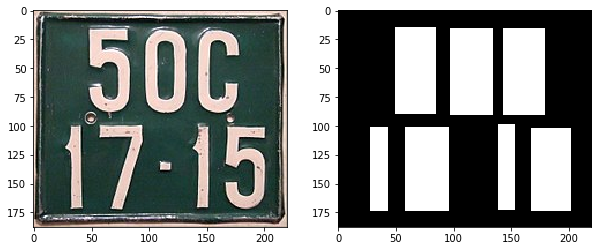

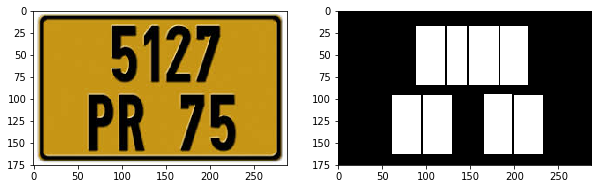

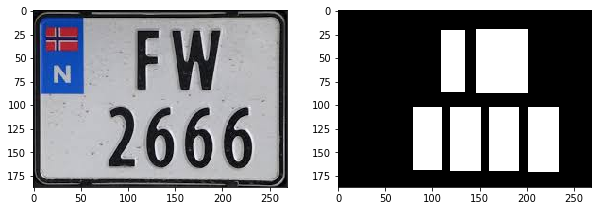

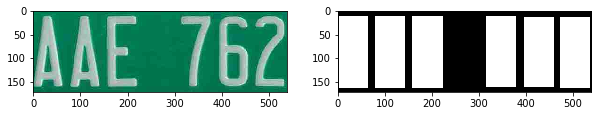

In [25]:
img_lst = glob.glob("test/*")
plate_list = []
for path in img_lst:
    charlist = []
    charlist.append(path.split("\\")[1])
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, (11,11))
    image, contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    blank=np.zeros_like(img)
    for i in range(len(contours)):
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        area = w*h
        if(area>0.015*img.shape[0]*img.shape[1] and area<0.75*img.shape[0]*img.shape[1]):
            character = opening[y:y+h,x:x+w]
            resz = cv2.resize(character,(32,32), interpolation = cv2.INTER_AREA)
            image = np.reshape(resz, (1,32, 32,1))
            ynew = model.predict_classes(image)
            if ynew[0]<11:
                charlist.append(ynew[0])
            else:
                charlist.append(chr(ynew[0]+54))
            blank = cv2.rectangle(blank,(x,y),(x+w,y+h),(255,255,255),-1)
    plate_list.append(charlist)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(img)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(blank,cmap='gray')
    plate_list.append(charlist)

In [26]:
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  

    csvwriter.writerows(plate_list) 